In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
%load_ext autoreload
%autoreload 2

# Предобработка данных

In [5]:
data = pd.read_csv("./data/kc_house_data.csv", parse_dates=["date"])

In [6]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

Удалим столбец id, столбец data был автоматически распарсился как datetime
Выделим вектор таргетов

In [8]:
data["year"] = data["date"].apply(lambda x: x.year)
data["month"] = data["date"].apply(lambda x: x.month)
data["day"] = data["date"].apply(lambda x: x.day)

In [9]:
data = data.drop(columns="date")

In [10]:
data = data.drop(columns="id")

In [11]:
target = data["price"]
data = data.drop(columns="price")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  year  

Разделение данных на обучающую и тестовую выборку

In [13]:
from sklearn.model_selection import train_test_split


X = data.to_numpy()
y = target.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
np.min(y), np.max(y)

(75000.0, 7700000.0)

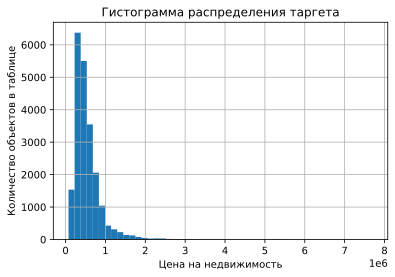

In [38]:
fig = plt.figure(figsize=(6, 4))
plt.title("Гистограмма распределения таргета")
plt.xlabel("Цена на недвижимость")
plt.ylabel("Количество объектов в таблице")
plt.hist(y, bins=50)
plt.grid(True)
fig.savefig("hist_target.pdf")

# Исследование случайного леса

In [14]:
import ensembles

In [15]:
from sklearn.metrics import mean_squared_error

In [39]:
param_n_estimators = np.linspace(100, 500, num=3, dtype=int)

Всего имеется 21 признак

In [40]:
param_feature_subsample_size = np.linspace(1, 21, num=3, dtype=int)

In [41]:
param_max_depth = list(np.linspace(3, 7, num=3, dtype=int))
param_max_depth.append(None)
param_max_depth = np.array(param_max_depth)

In [17]:
times = np.zeros(shape=(param_n_estimators.shape[0],
                        param_feature_subsample_size.shape[0],
                        param_max_depth.shape[0]))
rmse_ = np.zeros(shape=(param_n_estimators.shape[0],
                        param_feature_subsample_size.shape[0],
                        param_max_depth.shape[0]))

In [26]:
for i, n_estimators in enumerate(param_n_estimators):
    for j, feature_subsample_size in enumerate(param_feature_subsample_size):
        for k, max_depth in enumerate(param_max_depth):
            t1 = time.time()
            estimator = ensembles.RandomForestMSE(n_estimators, max_depth, feature_subsample_size)
            estimator.fit(X_train, y_train)
            y_pred = estimator.predict(X_test)
            t2 = time.time()
            times[i][j][k] = t2 - t1
            rmse_[i][j][k] = mean_squared_error(y_test, y_pred, squared=False)
            

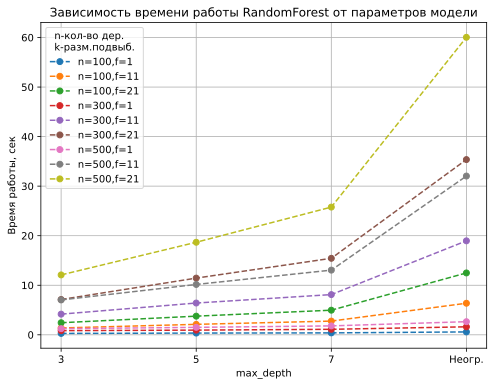

In [61]:
fig = plt.figure(figsize=(8, 6))
plt.title("Зависимость времени работы RandomForest от параметров модели")
for i in range(3):
    for j in range(3):
        plt.plot(np.arange(4), times[i, j, :],'o--', label="n="+str(param_n_estimators[i])+',f='+str(param_feature_subsample_size[j]))
plt.xlabel('max_depth')
plt.ylabel('Время работы, сек')
plt.xticks(np.arange(4), ['3', '5', '7', 'Неогр.'])
plt.legend(title="n-кол-во дер.\nk-разм.подвыб.")
plt.grid(True)
fig.savefig("time_RF.pdf")

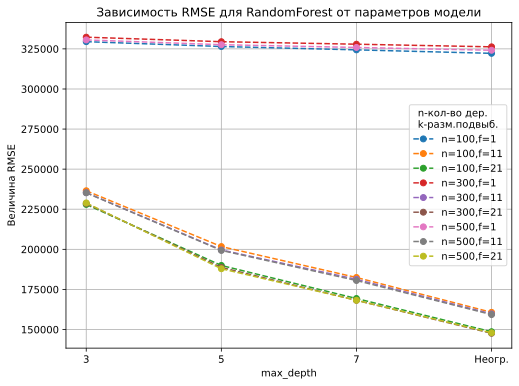

In [70]:
fig = plt.figure(figsize=(8, 6))
plt.title("Зависимость RMSE для RandomForest от параметров модели")
for i in range(3):
    for j in range(3):
        plt.plot(np.arange(4), rmse_[i, j, :],'o--', label="n="+str(param_n_estimators[i])+',f='+str(param_feature_subsample_size[j]))
plt.xlabel('max_depth')
plt.ylabel('Величина RMSE')
plt.xticks(np.arange(4), ['3', '5', '7', 'Неогр.'])
plt.legend(title="n-кол-во дер.\nk-разм.подвыб.")
plt.grid(True)
fig.savefig("rmse_RF.pdf")

# Исследование градиентного бустинга

In [16]:
param_n_estimators = [100, 300, 500]
param_feature_subsample_size = [1, 11, 21]
param_max_depth = [3, 5, 7, None]
param_learning_rate = [0.05, 0.1, 0.2]

In [18]:
times_gb = np.zeros(shape=(3, 3, 4, 3))
rmse_gb = np.zeros_like(times_gb)

In [19]:
for i, n_estimators in enumerate(param_n_estimators):
    for j, feature_subsample_size in enumerate(param_feature_subsample_size):
        for k, max_depth in enumerate(param_max_depth):
            for h, learining_rate in enumerate(param_learning_rate):
                t1 = time.time()
                estimator_gb = ensembles.GradientBoostingMSE(n_estimators,
                                                             learining_rate,
                                                             max_depth,
                                                             feature_subsample_size)
                estimator_gb.fit(X_train, y_train)
                y_pred = estimator_gb.predict(X_test)
                t2 = time.time()
                times_gb[i][j][k][h] = t2 - t1
                rmse_gb[i][j][k][h] = mean_squared_error(y_test, y_pred, squared=False)
                

In [20]:
times_gb

array([[[[ 0.34395623,  0.33529115,  0.34753919],
         [ 0.43768144,  0.4354732 ,  0.43375087],
         [ 0.52528858,  0.56651807,  0.5470624 ],
         [ 1.01061511,  1.0410192 ,  1.00353408]],

        [[ 1.62999129,  1.49385738,  1.38738036],
         [ 2.16478109,  2.21563244,  2.17592955],
         [ 2.8717134 ,  2.87615848,  2.89557719],
         [ 0.40395975,  0.39073086,  0.38088536]],

        [[ 2.31179452,  2.30608344,  2.30599451],
         [ 3.64238238,  3.63399196,  3.62669778],
         [ 4.94296241,  4.94927287,  4.94581795],
         [ 0.49325204,  0.50741649,  0.50670552]]],


       [[[ 0.84702134,  0.83728647,  0.85701752],
         [ 1.11169362,  1.10960698,  1.10182166],
         [ 1.34483337,  1.36093497,  1.34784794],
         [ 2.31576085,  2.3228507 ,  2.33049512]],

        [[ 3.81994319,  3.82797146,  4.34915757],
         [ 5.89761114,  5.88947129,  5.90428567],
         [ 8.09323645,  8.89022422,  9.07743168],
         [ 1.02332377,  1.01192069,  1.0

In [21]:
rmse_gb

array([[[[216041.2512362 , 216041.25223177, 216041.25049157],
         [224907.90482732, 224907.90516955, 224907.90642525],
         [238498.98990509, 238498.99062007, 238498.99000882],
         [312741.17547984, 312741.17595971, 312741.17573755]],

        [[179677.39362499, 178932.84857259, 191711.05214493],
         [208959.75041197, 216317.44724302, 206445.69269135],
         [232247.06041574, 237291.92392432, 234591.15259704],
         [266888.48164305, 269531.21986184, 270875.81898231]],

        [[167117.57561506, 160926.09783224, 155558.80237053],
         [191847.36529558, 191435.56066854, 193517.05178474],
         [198411.86901205, 201672.48541976, 196790.38058173],
         [222973.50969756, 222489.71043672, 225311.61105497]]],


       [[[214532.2415471 , 214532.24136897, 214532.23988206],
         [225085.73271098, 225085.73237266, 225085.73309686],
         [238890.30544167, 238890.30574439, 238890.30535478],
         [318850.46590555, 318850.46604275, 318850.46565879]],

In [22]:
np.min(rmse_gb)

155558.80237052919

In [23]:
np.argmin(rmse_gb)

26

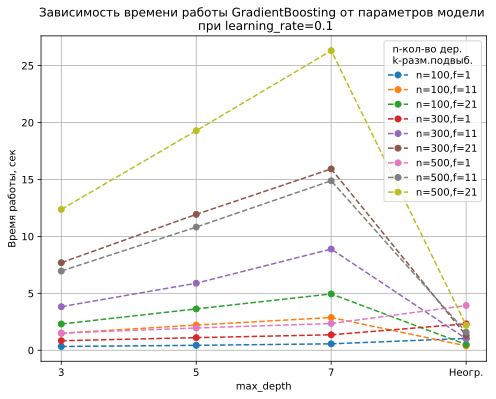

In [65]:
fig = plt.figure(figsize=(8, 6))
plt.title("Зависимость времени работы GradientBoosting от параметров модели \n при learning_rate=0.1")
for i in range(3):
    for j in range(3):
        plt.plot(np.arange(4), times_gb[i, j, :, 1],'o--', label="n="+str(param_n_estimators[i])+',f='+str(param_feature_subsample_size[j]))
plt.xlabel('max_depth')
plt.ylabel('Время работы, сек')
plt.xticks(np.arange(4), ['3', '5', '7', 'Неогр.'])
plt.legend(title="n-кол-во дер.\nk-разм.подвыб.")
plt.grid(True)
fig.savefig("time_GB.pdf")

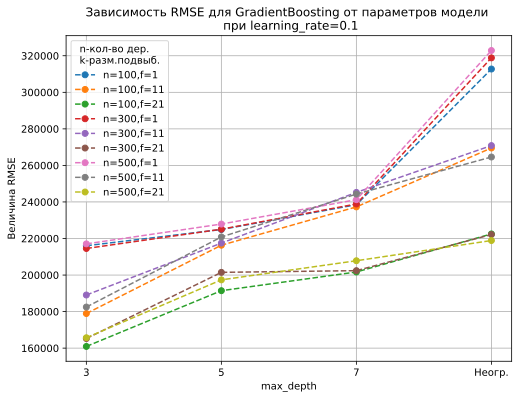

In [72]:
fig = plt.figure(figsize=(8, 6))
plt.title("Зависимость RMSE для GradientBoosting от параметров модели \n при learning_rate=0.1")
for i in range(3):
    for j in range(3):
        plt.plot(np.arange(4), rmse_gb[i, j, :, 1],'o--', label="n="+str(param_n_estimators[i])+',f='+str(param_feature_subsample_size[j]))
plt.xlabel('max_depth')
plt.ylabel('Величина RMSE')
plt.xticks(np.arange(4), ['3', '5', '7', 'Неогр.'])
plt.legend(title="n-кол-во дер.\nk-разм.подвыб.")
plt.grid(True)
fig.savefig("rmse_GB.pdf")